In [1]:
print("hello")

hello


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = load_breast_cancer()
X = df.data
y = df.target

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [5]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [6]:
y_pred=model.predict(X_test)

In [7]:
accuracy_score(y_test,y_pred)

0.9298245614035088

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.94      0.96      0.95        76

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



Accuracy: 98.25%


<Axes: >

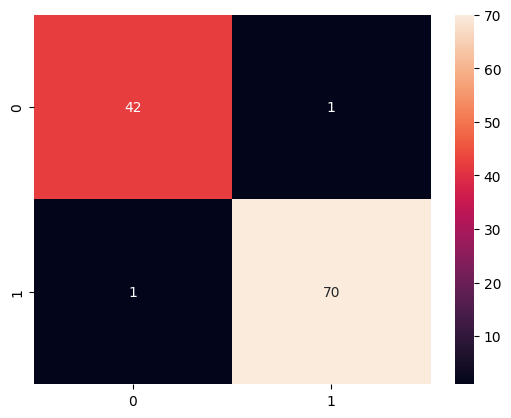

In [19]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def sigmoid(self, z):
        """Sigmoid function"""
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """Train the model using gradient descent"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zeros

        for _ in range(self.epochs):
            # Compute the model (linear combination)
            linear_model = np.dot(X, self.weights)
            predictions = self.sigmoid(linear_model)
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))

            # Update weights and bias using gradient descent
            self.weights -= self.lr * dw

    def predict_prob(self, X):
        """Return probabilities for the input"""
        linear_model = np.dot(X, self.weights)
        return self.sigmoid(linear_model)

    def predict(self, X):
        """Predict binary outcomes (0 or 1)"""
        probs = self.predict_prob(X)
        return np.where(probs >= 0.5, 1, 0)

# 1. Load the dataset
data = load_breast_cancer()
X = data.data       # Features (30 features for each sample)
y = data.target     # Labels (0 = malignant, 1 = benign)

# 2. Split the data into training and test sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Initialize and train the logistic regression model
model = LogisticRegressionScratch(lr=0.1, epochs=1000)
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)

# 6. Evaluate performance (Accuracy)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_pred,y_test)
sns.heatmap(conf,annot=True)
